# Import Dependencies and Load Experiment Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plottable import ColumnDefinition, Table
import xlrd

In [2]:
experiment_data = pd.read_excel('experiment_results.xlsx')
experiment_data.head()

,Instance,Unnamed: 1,ILS,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,ACO,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ACO++,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,run #01,run #2,run #3,run #4,run #5,NaN,run #01,run #2,run #3,run #4,run #5,NaN,run #01,run #2,run #3,run #4,run #5
1,eil51_01_bsc_01_01.thop,NaN,5407,5453,5407,5407,5407,NaN,5355,5355,5324,5228,5306,NaN,5554,5554,5554,5554,5554
2,eil51_01_bsc_01_02.thop,NaN,6082,6082,6059,6059,6059,NaN,6306,6300,6334,6334,6334,NaN,6491,6456,6491,6491,6456
3,eil51_01_bsc_01_03.thop,NaN,6524,6583,6577,6579,6483,NaN,6825,6642,6825,6728,6825,NaN,6827,6827,6825,6827,6827
4,eil51_01_bsc_05_01.thop,NaN,19413,19413,18999,18999,19214,NaN,18979,19159,18541,18846,18805,NaN,19498,19467,19467,19322,19748


# Data Preprocessing

In [3]:
# Drop the first row
experiment_data = experiment_data.drop(0).reset_index(drop=True)
experiment_data = experiment_data.drop(columns=['Unnamed: 1', 'Unnamed: 7', 'Unnamed: 13'])
# Rename the columns
experiment_data = experiment_data.rename(columns={
    'ILS': 'ILS#1',
    'Unnamed: 3': 'ILS#2',
    'Unnamed: 4': 'ILS#3',
    'Unnamed: 5': 'ILS#4',
    'Unnamed: 6': 'ILS#5',
    'ACO': 'ACO#1',
    'Unnamed: 9': 'ACO#2',
    'Unnamed: 10': 'ACO#3',
    'Unnamed: 11': 'ACO#4',
    'Unnamed: 12': 'ACO#5',
    'ACO++': 'ACO++#1',
    'Unnamed: 15': 'ACO++#2',
    'Unnamed: 16': 'ACO++#3',
    'Unnamed: 17': 'ACO++#4',
    'Unnamed: 18': 'ACO++#5'
})
# Remove the ".thop" suffix
experiment_data['Instance'] = experiment_data['Instance'].str.replace('.thop$', '', regex=True)

# Extract the instance type 
experiment_data['Instance Type'] = experiment_data['Instance'].str.extract(r'^([^_]+_[^_]+)')

# Extract the knapsack type 
experiment_data['Knapsack Type'] = experiment_data['Instance'].str.extract(r'^[^_]+_[^_]+_(.*)')

# Reorder the columns
experiment_data = experiment_data[['Instance', 'Instance Type', 'Knapsack Type'] + [col for col in experiment_data.columns if col not in ['Instance', 'Instance Type', 'Knapsack Type']]]

In [4]:
experiment_data

,Instance,Instance Type,Knapsack Type,ILS#1,ILS#2,ILS#3,ILS#4,ILS#5,ACO#1,ACO#2,ACO#3,ACO#4,ACO#5,ACO++#1,ACO++#2,ACO++#3,ACO++#4,ACO++#5
0,eil51_01_bsc_01_01,eil51_01,bsc_01_01,5407,5453,5407,5407,5407,5355,5355,5324,5228,5306,5554,5554,5554,5554,5554
1,eil51_01_bsc_01_02,eil51_01,bsc_01_02,6082,6082,6059,6059,6059,6306,6300,6334,6334,6334,6491,6456,6491,6491,6456
2,eil51_01_bsc_01_03,eil51_01,bsc_01_03,6524,6583,6577,6579,6483,6825,6642,6825,6728,6825,6827,6827,6825,6827,6827
3,eil51_01_bsc_05_01,eil51_01,bsc_05_01,19413,19413,18999,18999,19214,18979,19159,18541,18846,18805,19498,19467,19467,19322,19748
4,eil51_01_bsc_05_02,eil51_01,bsc_05_02,22215,22206,22303,22020,22290,22369,22328,22044,22024,21657,22921,23145,22845,22921,22850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,dsj1000_10_usw_05_02,dsj1000_10,usw_05_02,252248,314509,305044,214716,279763,2639436,2636298,2635811,2683619,2598961,3036275,3033345,3035011,3029098,3050095
428,dsj1000_10_usw_05_03,dsj1000_10,usw_05_03,363169,364915,303666,277778,366457,3015340,3071281,2982092,3042916,2954879,3339482,3332129,3359360,3312391,3371333
429,dsj1000_10_usw_10_01,dsj1000_10,usw_10_01,184481,204100,232585,182110,189039,2772306,2781391,2702705,2816563,2768641,3381064,3383778,3347889,3365002,3366021
430,dsj1000_10_usw_10_02,dsj1000_10,usw_10_02,273972,280814,277555,245614,289623,3436004,3424642,3486164,3448040,3551469,4168475,4213627,4170552,4183764,4169464


In [5]:
# Calculate the average profit achieved by 3 algorithms for each instance on 5 attempts
experiment_data['ILS Avg'] = experiment_data[['ILS#1', 'ILS#2', 'ILS#3', 'ILS#4', 'ILS#5']].mean(axis=1)
experiment_data['ACO Avg'] = experiment_data[['ACO#1', 'ACO#2', 'ACO#3', 'ACO#4', 'ACO#5']].mean(axis=1)
experiment_data['ACO++ Avg'] = experiment_data[['ACO++#1', 'ACO++#2', 'ACO++#3', 'ACO++#4', 'ACO++#5']].mean(axis=1)

# Calculate the max profit achieved by 3 algorithms for each instance on 5 attempts
experiment_data['ILS Max'] = experiment_data[['ILS#1', 'ILS#2', 'ILS#3', 'ILS#4', 'ILS#5']].max(axis=1)
experiment_data['ACO Max'] = experiment_data[['ACO#1', 'ACO#2', 'ACO#3', 'ACO#4', 'ACO#5']].max(axis=1)
experiment_data['ACO++ Max'] = experiment_data[['ACO++#1', 'ACO++#2', 'ACO++#3', 'ACO++#4', 'ACO++#5']].max(axis=1)

In [6]:
experiment_data_avg_max = experiment_data[['Instance Type' ,'Knapsack Type', 'ILS Avg', 'ILS Max', 'ACO Avg', 'ACO Max', 'ACO++ Avg', 'ACO++ Max']]
experiment_data_avg_max

,Instance Type,Knapsack Type,ILS Avg,ILS Max,ACO Avg,ACO Max,ACO++ Avg,ACO++ Max
0,eil51_01,bsc_01_01,5416.2,5453,5313.6,5355,5554.0,5554
1,eil51_01,bsc_01_02,6068.2,6082,6321.6,6334,6477.0,6491
2,eil51_01,bsc_01_03,6549.2,6583,6769.0,6825,6826.6,6827
3,eil51_01,bsc_05_01,19207.6,19413,18866.0,19159,19500.4,19748
4,eil51_01,bsc_05_02,22206.8,22303,22084.4,22369,22936.4,23145
...,...,...,...,...,...,...,...,...
427,dsj1000_10,usw_05_02,273256.0,314509,2638825.0,2683619,3036764.8,3050095
428,dsj1000_10,usw_05_03,335197.0,366457,3013301.6,3071281,3342939.0,3371333
429,dsj1000_10,usw_10_01,198463.0,232585,2768321.2,2816563,3368750.8,3383778
430,dsj1000_10,usw_10_02,273515.6,289623,3469263.8,3551469,4181176.4,4213627


# Heatmap Comparison of ThOP solution approaches

In [7]:
def scale_row(row):
    max_value = max(row['ILS Max'], row['ACO Max'], row['ACO++ Max'])
    return pd.Series({
        'ILS Avg Scaled': row['ILS Avg'] / max_value,
        'ACO Avg Scaled': row['ACO Avg'] / max_value,
        'ACO++ Avg Scaled': row['ACO++ Avg'] / max_value,
        'ILS Is Best' : row['ILS Max'] == max_value,
        'ACO Is Best': row['ACO Max'] == max_value,
        'ACO++ Is Best': row['ACO++ Max'] == max_value
    })

# Apply the scaling function to each row
scaled_values = experiment_data_avg_max.apply(scale_row, axis=1)
experiment_data_avg_scaled = pd.concat([ experiment_data[['Instance Type' ,'Knapsack Type']], scaled_values], axis=1)

In [8]:
experiment_data_avg_scaled

,Instance Type,Knapsack Type,ILS Avg Scaled,ACO Avg Scaled,ACO++ Avg Scaled,ILS Is Best,ACO Is Best,ACO++ Is Best
0,eil51_01,bsc_01_01,0.975189,0.956716,1.000000,False,False,True
1,eil51_01,bsc_01_02,0.934864,0.973902,0.997843,False,False,True
2,eil51_01,bsc_01_03,0.959309,0.991504,0.999941,False,False,True
3,eil51_01,bsc_05_01,0.972635,0.955337,0.987462,False,False,True
4,eil51_01,bsc_05_02,0.959464,0.954176,0.990987,False,False,True
...,...,...,...,...,...,...,...,...
427,dsj1000_10,usw_05_02,0.089589,0.865162,0.995630,False,False,True
428,dsj1000_10,usw_05_03,0.099426,0.893801,0.991578,False,False,True
429,dsj1000_10,usw_10_01,0.058651,0.818115,0.995559,False,False,True
430,dsj1000_10,usw_10_02,0.064912,0.823344,0.992299,False,False,True


In [9]:
def construct_heatmap(algorithm):
    heatmap_data = experiment_data_avg_scaled.pivot(index="Knapsack Type", columns="Instance Type", values=f"{algorithm} Avg Scaled")
    # Create the heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(heatmap_data, annot=False, cmap="YlOrBr", cbar=True)
    
    # Highlight the cells where the value is 1 with diamonds
    for y in range(heatmap_data.shape[0]):
        for x in range(heatmap_data.shape[1]):
            knapsack_type = heatmap_data.index[y]
            instance_type = heatmap_data.columns[x]
            if experiment_data_avg_scaled.loc[(experiment_data_avg_scaled["Knapsack Type"] == knapsack_type) & (experiment_data_avg_scaled["Instance Type"] == instance_type)][f"{algorithm} Is Best"].values[0]:
                ax.text(x + 0.5, y + 0.5, '◇', color='black', ha='center', va='center')
    
    # Add labels and title
    plt.xlabel('Instance Type')
    plt.ylabel('Knapsack Type')
    plt.title(algorithm)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.savefig(f"../showcase/{algorithm}_heatmap.png")
    plt.show()

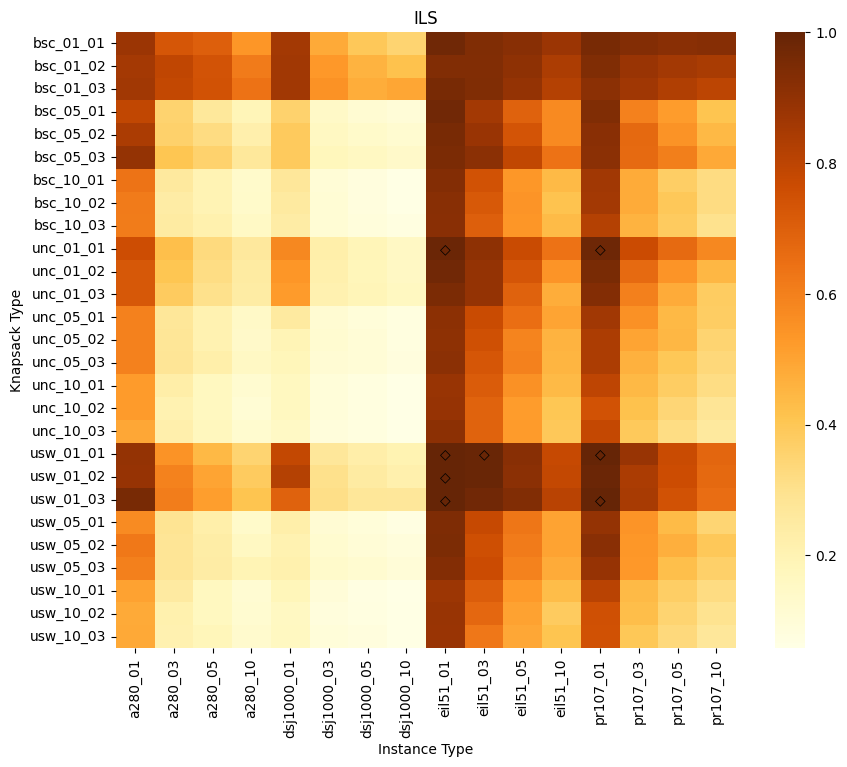

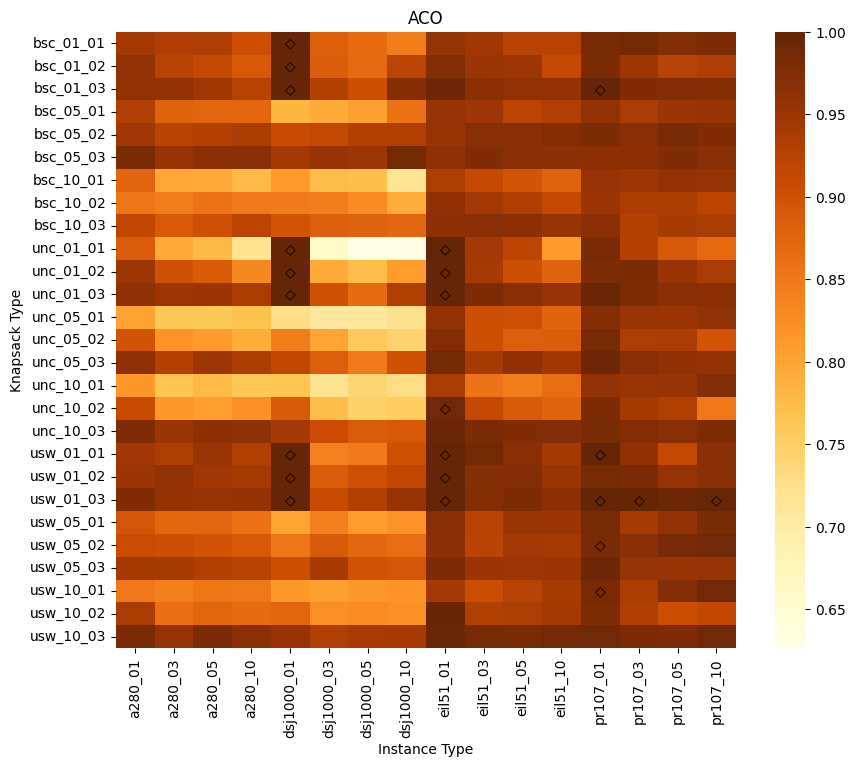

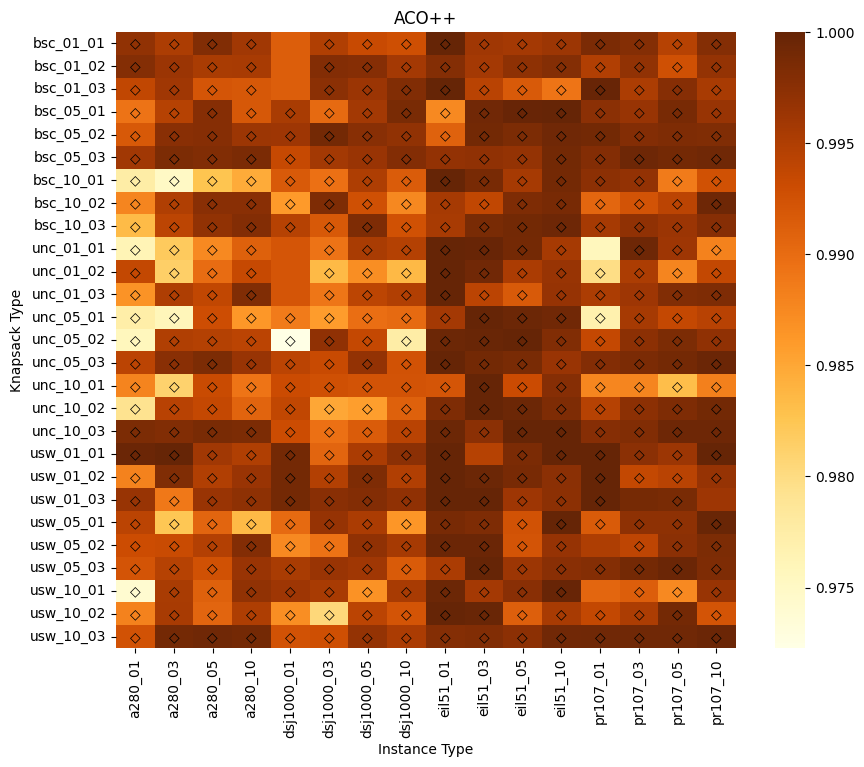

In [10]:
construct_heatmap("ILS")
construct_heatmap("ACO")
construct_heatmap("ACO++")

# Table Comparison of ThOP solution approaches

In [11]:
# Define the algorithms to compare
algorithms = ['ILS', 'ACO', 'ACO++']

# Initialize the comparison DataFrame
comparison = pd.DataFrame(index=algorithms, columns=algorithms, data='-')

In [12]:
def calculate_percentage(df, algo_i, algo_j):
    better_or_equal = (df[f'{algo_i} Avg'] >= df[f'{algo_j} Avg']).sum()
    total_instances = len(df)
    return (better_or_equal / total_instances) * 100

# Fill in the comparison DataFrame
for algo_i in algorithms:
    for algo_j in algorithms:
        if algo_i != algo_j:
            percentage = calculate_percentage(experiment_data_avg_max, algo_i, algo_j)
            comparison.loc[algo_i, algo_j] = f'{percentage:.2f}%'

# Print the resulting comparison table
comparison

,ILS,ACO,ACO++
ILS,-,2.55%,1.16%
ACO,98.38%,-,4.86%
ACO++,99.77%,96.99%,-


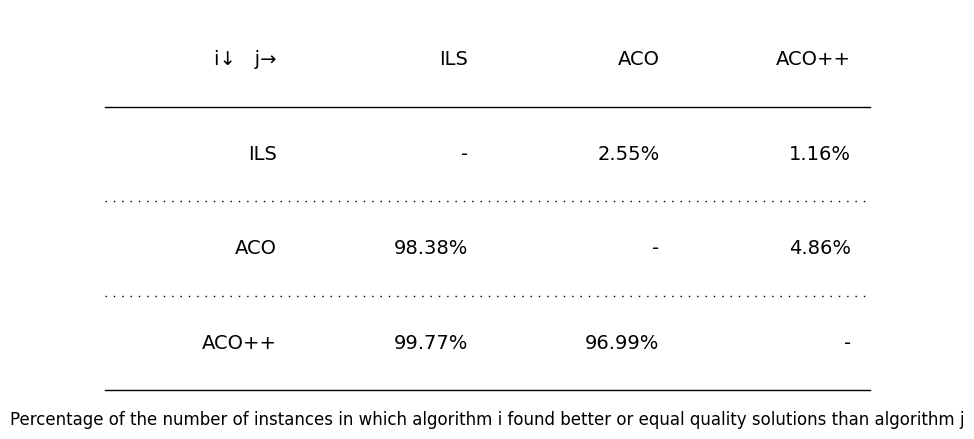

In [13]:
col_defs = (
    [
        ColumnDefinition(
            name="index",
            title="i↓   j→",
        ),
    ]
)

fig, ax = plt.subplots(figsize=(10, 5))
table = Table(
    comparison,
    column_definitions=col_defs,
    row_dividers=True,
    ax = ax,
    footer_divider=True,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)

plt.title("Percentage of the number of instances in which algorithm i found better or equal quality solutions than algorithm j", y=-0.1)
plt.savefig("../showcase/Comparison_Table.png")
plt.show()